## Analysis of Student Debt and Outcomes for Different College Types


### Data Read
- Read the 2009 and 2017 Data
- Merge the data set on school Id (UNITID)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")

### Data Cleaning
- Keep only the 4 year institutions (remove all non 4 year institutes)
- Replace object "PrivacySuppressed" in data columns by NaN values
- Convert data columns to float

In [3]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index(drop=True)

#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

#Convert the data columns to floats
for column in merged_df.columns[10:]:
    merged_df[column] = pd.to_numeric(merged_df[column])

### Create a new dataframe for Year 2009
- Create a dataframe to hold institute counts, median debt and retention rate for each institute type
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [6]:
# Remove all the rows with NaN for "Retention" and "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["RET_FT4", "GRAD_DEBT_MDN_x"], inplace=False)
df1 = df.groupby(["CONTROL"])[["RET_FT4", "GRAD_DEBT_MDN_x"]].mean()

# Total institues in each category
df1["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df1["RET_FT4"] = df1["RET_FT4"].map("{:.2%}".format)
df1["GRAD_DEBT_MDN_x"] = df1["GRAD_DEBT_MDN_x"].map("${:,.0f}".format)

# Convert to dataframe
df1 = pd.DataFrame(df1).reset_index()
del df1["CONTROL"]

# Rename Column and Index
df1.rename(columns={"RET_FT4":"Retention Rate", "GRAD_DEBT_MDN_x":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df1.index.rename('Control', inplace=True)

# Change column order
df1 = df1[["Count", "Median Debt", "Retention Rate"]]

### Create a new dataframe for Year 2017
- Create a dataframe to hold institute counts, median debt and retention rate for each institute type
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [7]:
# Remove all the rows with NaN for "Retention" and "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["RET_FT4", "GRAD_DEBT_MDN_y"], inplace=False)
df2 = df.groupby(["CONTROL"])[["RET_FT4", "GRAD_DEBT_MDN_y"]].mean()

# Total institues in each category
df2["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df2["RET_FT4"] = df2["RET_FT4"].map("{:.2%}".format)
df2["GRAD_DEBT_MDN_y"] = df2["GRAD_DEBT_MDN_y"].map("${:,.0f}".format)

# Convert to dataframe
df2 = pd.DataFrame(df2).reset_index()
del df2["CONTROL"]

# Rename Column and Index
df2.rename(columns={"RET_FT4":"Retention Rate", "GRAD_DEBT_MDN_y":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df2.index.rename('Control', inplace=True)

# Change column order
df2 = df2[["Count", "Median Debt", "Retention Rate"]]

### Merge 2009 and 2017 dataframe
- Merge 2009 and 2017 datafrmaes to create a new summary dataframe to hold median debt and retention rate
- Rename the columns to indicate 2009 and 20017 year data
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [8]:
# Create combined 2009 and 2017 summary
summary_data = df1.merge(df2,left_index=True,right_index=True,how="inner")
summary_data.rename(columns={"Count_x":"Count_2009",
                             "Median Debt_x":"Median Debt_2009",
                             "Count_y":"Count_2017",
                             "Median Debt_y":"Median Debt_2017"},
                    inplace="True")

summary_data

,Count_2009,Median Debt_2009,Retention Rate_x,Count_2017,Median Debt_2017,Retention Rate_y
Control,,,,,,
Public,615,"$20,903",74.63%,590,"$15,396",74.66%
Priv. NonProfit,1127,"$23,946",73.94%,1063,"$17,820",74.48%
Priv. ForProfit,261,"$25,938",54.44%,174,"$19,053",56.95%


### Plot
1. Year 2009: Display debt distribution for different college type
2. Year 2017: Display debt distribution for different college type 

In [10]:
# Assign colors for each institution type and the names
colors = ['b', 'g', 'r']
names = ["Public", "Private Non Profit", "Private For Profit"]

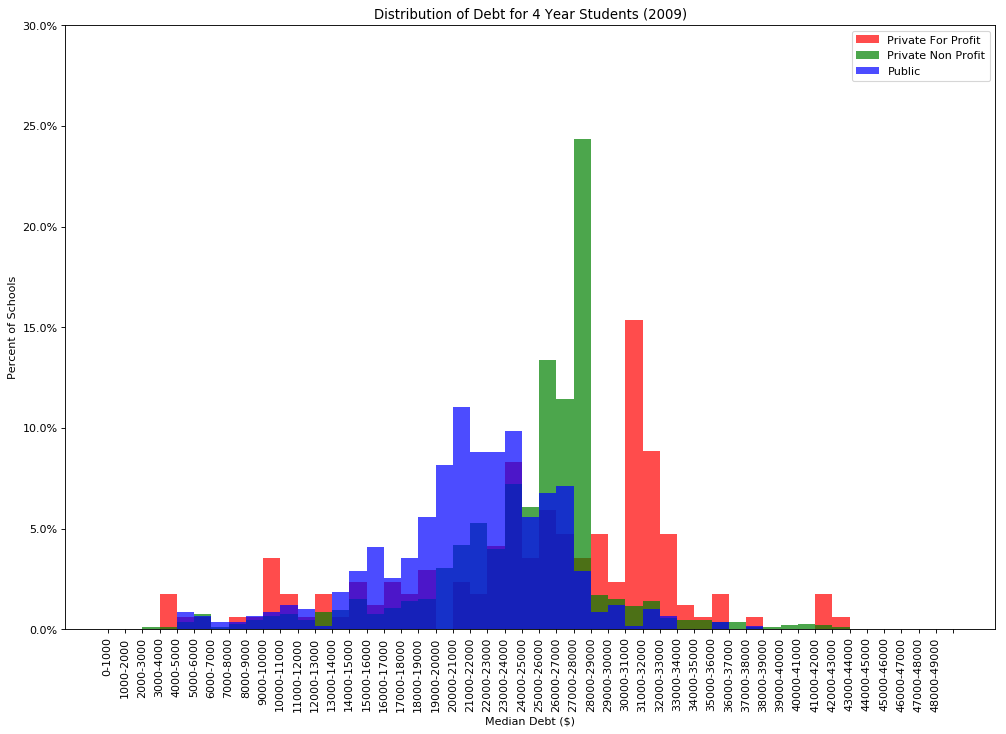

In [11]:
# Make a separate list for each institution type for 2009
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])

#Define Bins
bin_width = 1000
bins = range(0, 50000, bin_width)
bin_labels = []
for n in range(0, len(bins)-1):
    bin_labels.append(f"{bins[n]}-{bins[n+1]}")

# Create the plot
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Distribution of Debt for 4 Year Students (2009)"
plt.title(graph_title)
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()
locs, labels = plt.xticks()
plt.xticks(bins, bin_labels, rotation="vertical")

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

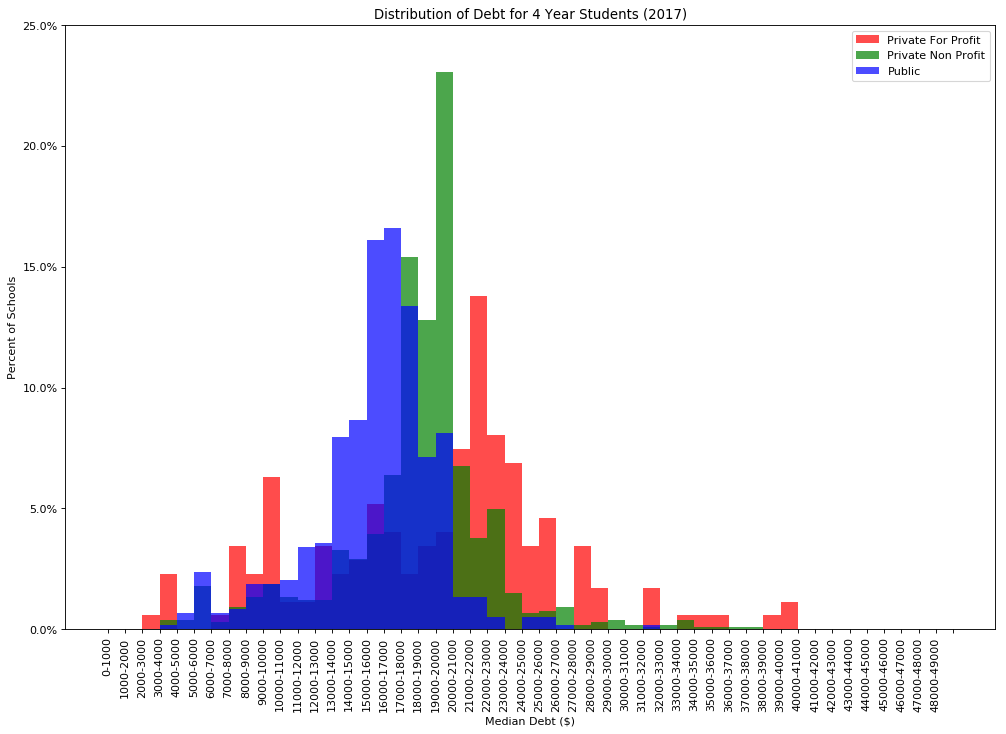

In [12]:
# Make a separate list for each institution type for 2017
y1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_y'])
y2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_y'])
y3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_y'])

# Create the plot
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist([y1, y2, y3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Distribution of Debt for 4 Year Students (2017)"
plt.title(graph_title)
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()
locs, labels = plt.xticks()
plt.xticks(bins, bin_labels, rotation="vertical")

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

### Plot Repayment Distribution
1. Plot distribution of 3-years repayment rate for each institite type
2. Plot distribution of 5-years repayment rate for each institite type
3. Plot distribution of 7-years repayment rate for each institite type

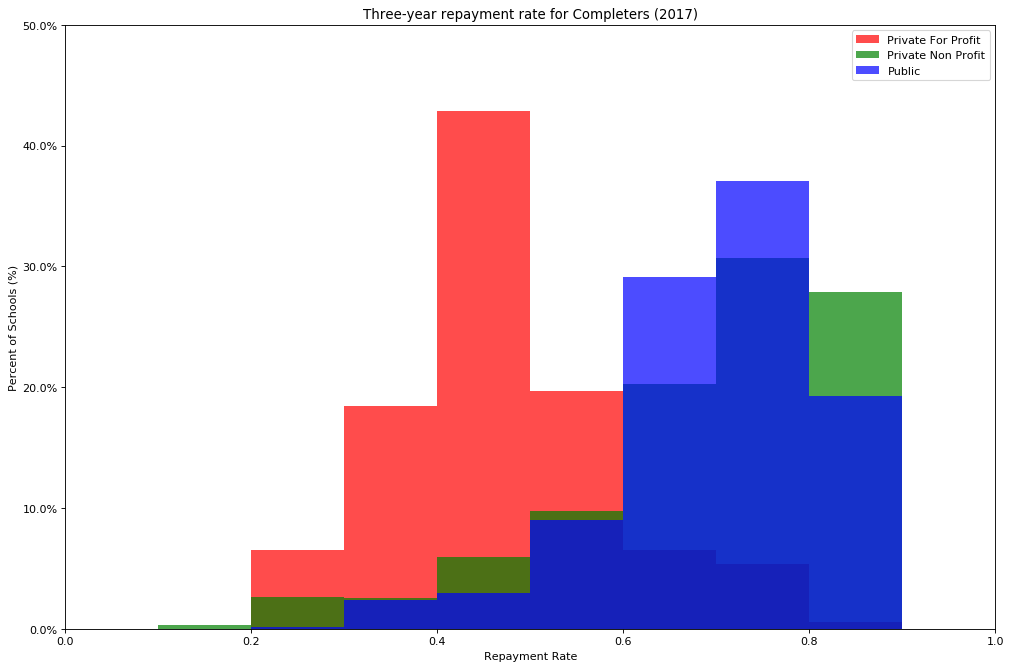

In [14]:
#Define Bins
bin_width = 0.1
bins = np.arange(0, 1, bin_width)

# Make a separate list for each institution type for 3-year repayment 
x1 = list(df[df['CONTROL'] == 1]['COMPL_RPY_3YR_RT'])
x2 = list(df[df['CONTROL'] == 2]['COMPL_RPY_3YR_RT'])
x3 = list(df[df['CONTROL'] == 3]['COMPL_RPY_3YR_RT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins=bins, density=True, color=colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Three-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 1)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

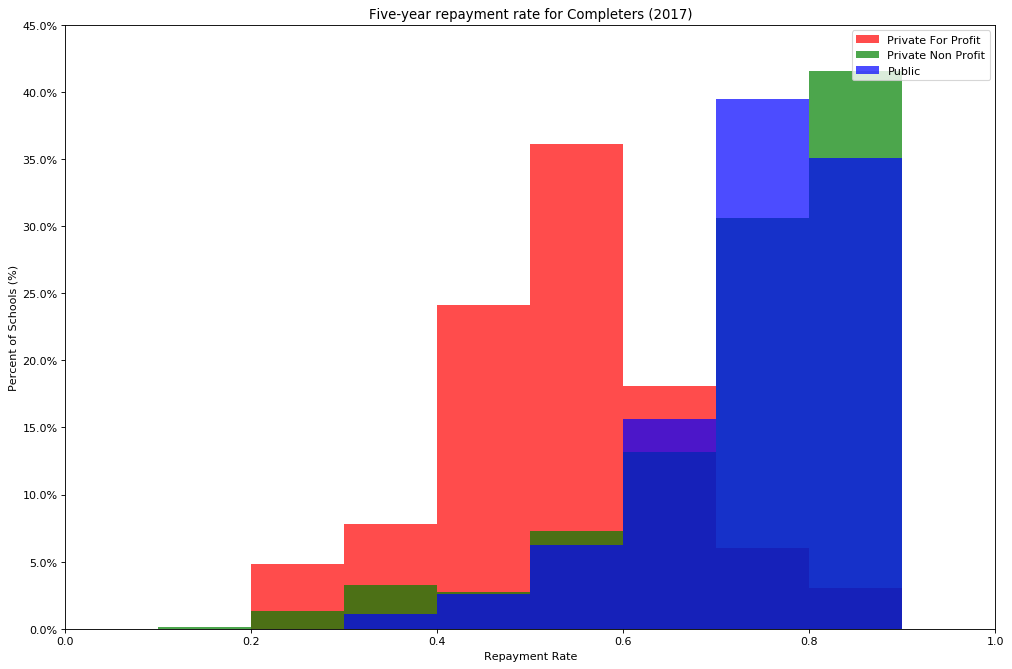

In [40]:
# Make a separate list for each institution type for 3-year repayment
y1 = list(df[df['CONTROL'] == 1]['COMPL_RPY_5YR_RT'])
y2 = list(df[df['CONTROL'] == 2]['COMPL_RPY_5YR_RT'])
y3 = list(df[df['CONTROL'] == 3]['COMPL_RPY_5YR_RT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([y1, y2, y3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Five-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 1)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

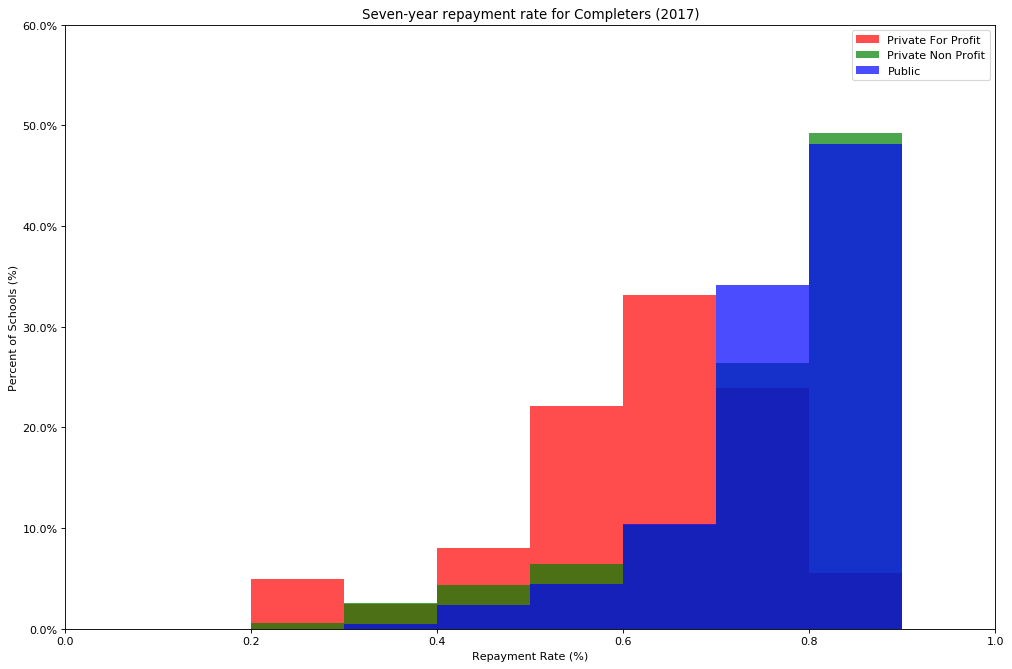

In [41]:
# Make a separate list for each institution type for 3-year repayment
z1 = list(df[df['CONTROL'] == 1]['COMPL_RPY_7YR_RT'])
z2 = list(df[df['CONTROL'] == 2]['COMPL_RPY_7YR_RT'])
z3 = list(df[df['CONTROL'] == 3]['COMPL_RPY_7YR_RT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([z1, z2, z3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Seven-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 1)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

### Plot Debt on Graduation against Future Earnings
1. Take a sample of the cleaned data
2. Create a scatter plot of median graduate debt against median earnings 10 years after graduation

In [17]:
#Create a smaller sample to test with
test_df = merged_df[["GRAD_DEBT_MDN_y", "MD_EARN_WNE_P10", "CONTROL"]]
test_df = pd.DataFrame(test_df.dropna())
test_df = test_df.sample(n=1000)
test_df = test_df.reset_index()

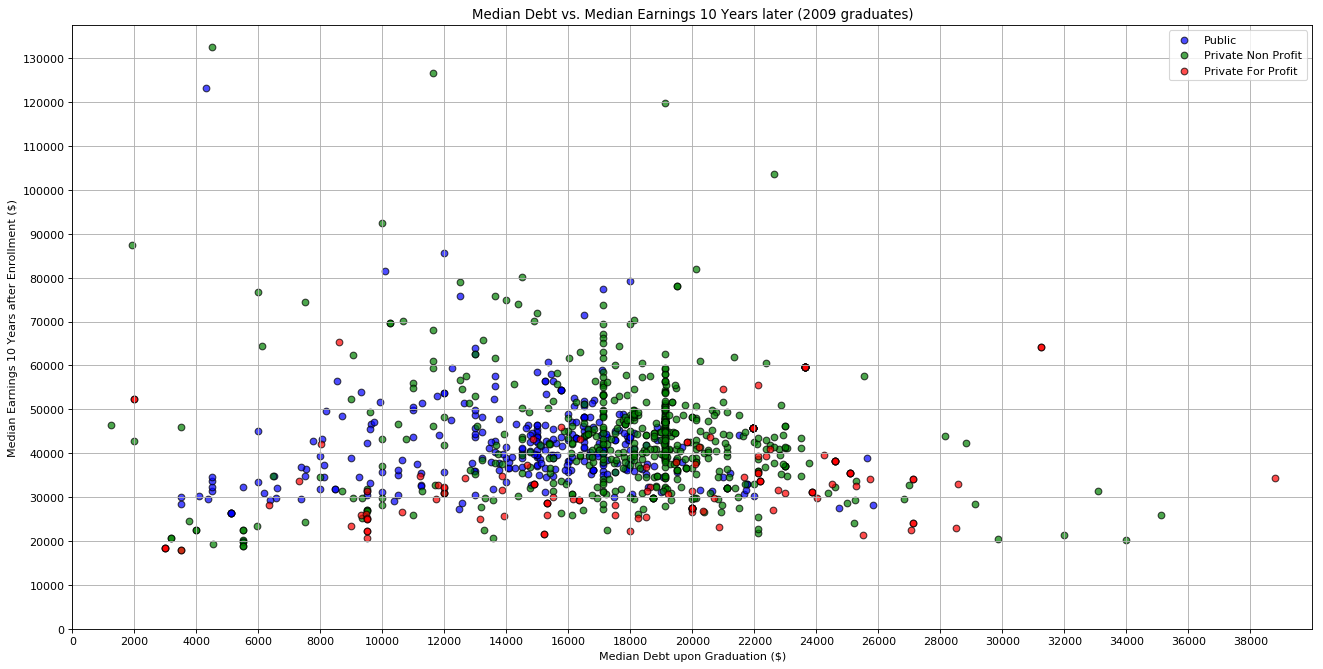

In [20]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label=names[0], color=colors[0], edgecolors="k", alpha=0.7)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label=names[1], color=colors[1], edgecolors="k", alpha=0.7)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label=names[2], color=colors[2], edgecolors="k", alpha=0.7)

# Setup axis labels and ticks
plt.xticks(np.arange(0, max(test_df["GRAD_DEBT_MDN_y"]) + 500, 2000))
plt.yticks(np.arange(0, max(test_df["MD_EARN_WNE_P10"]) + 5000, 10000))
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.ylim(0, max(test_df["MD_EARN_WNE_P10"]) + 5000)
plt.xlim(0, 40000)
graph_title = "Median Debt vs. Median Earnings 10 Years later (2009 graduates)"
plt.title(graph_title)
plt.grid()
plt.legend()

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

In [58]:
df1 = df.groupby(["CONTROL"]).agg({"RET_FT4":"describe",
                                   "GRAD_DEBT_MDN_y":"describe"
                                  })
df1

RET_FT4                                                                \
          count      mean       std  min       25%      50%       75%     max   
CONTROL                                                                         
1         590.0  0.746623  0.113337  0.0  0.684375  0.75000  0.825475  0.9734   
2        1063.0  0.744762  0.147815  0.0  0.666700  0.76630  0.845950  1.0000   
3         174.0  0.569523  0.255303  0.0  0.422975  0.56865  0.754200  1.0000   

        GRAD_DEBT_MDN_y                                                \
                  count          mean          std     min        25%   
CONTROL                                                                 
1                 590.0  15395.943220  3642.308265  3500.0  13917.125   
2                1063.0  17819.840075  4413.684809  3175.0  16634.500   
3                 174.0  19052.574713  7186.224718  2000.0  14907.500   

                                       
              50%        75%      max  
CONTROL                                
1        15997.25  17464.125  31135.0  
2        18375.00  19500.000  37542.0  
3        20437.50  23187.250  39756.0

### Create a map
1. Take a sample of the cleaned data
2. Create a scatter plot of median graduate debt against median earnings 10 years after graduation

In [36]:
# Create a gmap with the top 20 most expensive state schools

# Configure gmaps
import gmaps
import gmaps.datasets
from config import gkey
import pandas as pd
gmaps.configure(api_key=gkey)


heatmap_df = merged_df.loc[merged_df["CONTROL"]==1][["LATITUDE", "LONGITUDE", "GRAD_DEBT_MDN_y"]]
heatmap_df = heatmap_df.dropna()
heatmap_df = heatmap_df.sort_values("GRAD_DEBT_MDN_y", ascending=False).head(100)

# 
locations = heatmap_df[["LATITUDE", "LONGITUDE"]]
weights = heatmap_df["GRAD_DEBT_MDN_y"]

In [39]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weights, point_radius=10)
#heat_layer = gmaps.heatmap_layer(locations, weights=weights, dissipating=False, point_radius=1)

markers = gmaps.marker_layer(locations, hover_text="hover_text")

# Add layer
#fig.add_layer(markers)
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))